# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [4]:
%%R
 
# Import data with R
df <- read_csv('fireworks-14to24.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 39
  Unique.Key Created.Date        Closed.Date         Agency Agency.Name         
       <dbl> <dttm>              <dttm>              <chr>  <chr>               
1   43541687 2019-08-13 20:29:12 2019-08-13 20:42:05 NYPD   New York City Polic…
2   43513428 2019-08-10 22:35:49 2019-08-11 09:26:46 NYPD   New York City Polic…
3   43527406 2019-08-12 20:34:49 2019-08-12 21:39:10 NYPD   New York City Polic…
4   46536390 2020-06-19 23:25:27 2020-06-20 00:23:38 NYPD   New York City Polic…
# ℹ 34 more variables: Complaint.Type <chr>, Descriptor <chr>,
#   Location.Type <chr>, Incident.Zip <dbl>, Incident.Address <chr>,
#   Street.Name <chr>, Cross.Street.1 <chr>, Cross.Street.2 <chr>,
#   Intersection.Street.1 <chr>, Intersection.Street.2 <chr>,
#   Address.Type <chr>, City <chr>, Landmark <chr>, Facility.Type <chr>,
#   Status <chr>, Due.Date <chr>, Resolution.Action.Updated.Date <chr>,
#   Community.Board <chr>, Borough <chr>, X.Coordinate..State.Plane. <dbl>, …


In [5]:
%%R
colnames(df)

 [1] "Unique.Key"                     "Created.Date"                  
 [3] "Closed.Date"                    "Agency"                        
 [5] "Agency.Name"                    "Complaint.Type"                
 [7] "Descriptor"                     "Location.Type"                 
 [9] "Incident.Zip"                   "Incident.Address"              
[11] "Street.Name"                    "Cross.Street.1"                
[13] "Cross.Street.2"                 "Intersection.Street.1"         
[15] "Intersection.Street.2"          "Address.Type"                  
[17] "City"                           "Landmark"                      
[19] "Facility.Type"                  "Status"                        
[21] "Due.Date"                       "Resolution.Action.Updated.Date"
[23] "Community.Board"                "Borough"                       
[25] "X.Coordinate..State.Plane."     "Y.Coordinate..State.Plane."    
[27] "Park.Facility.Name"             "Park.Borough"                  
[29] "

## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [11]:
%%R 
# groupby Location.Type, count and sort
df %>% 
    group_by(Location.Type) %>% 
    summarise(count = n()) %>% 
    arrange(desc(count))


# A tibble: 10 × 2
   Location.Type              count
   <chr>                      <int>
 1 Street/Sidewalk            58072
 2 Residential Building/House 25161
 3 Park/Playground             6370
 4 <NA>                        2355
 5 Store/Commercial             943
 6 Pier                         403
 7 Highway                       67
 8 Bridge                        33
 9 Roadway Tunnel                 3
10 Senior Address                 1


## 1-D visualizations (aka distributions)


### Continus variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

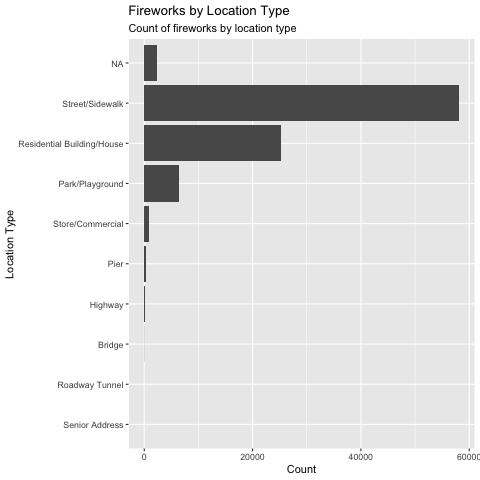

In [14]:
%%R
# code for plot 1
# make sure to make a meaningful title and subtitle

# barplot of fireworks by location type
df %>% 
    group_by(Location.Type) %>% 
    summarise(count = n()) %>% 
    ggplot(aes(x = reorder(Location.Type, count), y = count)) +
    geom_bar(stat = 'identity') +
    coord_flip() +
    labs(title = 'Fireworks by Location Type', subtitle = 'Count of fireworks by location type') +
    xlab('Location Type') +
    ylab('Count')

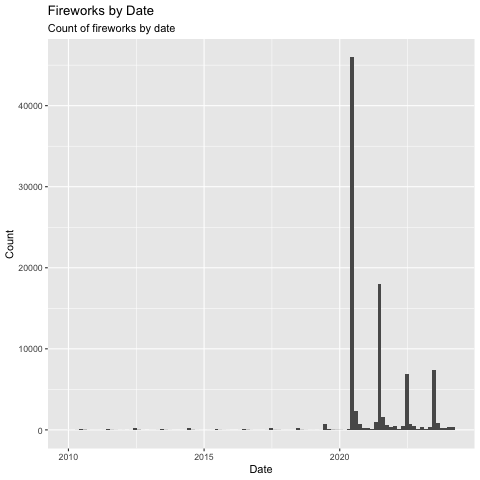

In [15]:
%%R
# code for plot 2
# make sure to make a meaningful title and subtitle
# draw a histogram by Created.Date
df %>%
    ggplot(aes(x = Created.Date)) +
    geom_histogram(bins=100) +
    labs(title = 'Fireworks by Date', subtitle = 'Count of fireworks by date') +
    xlab('Date') +
    ylab('Count')

In [18]:
%%R
# create a new column "year" and "month" from "Created.Date"
df <- df %>% 
    mutate(year = year(Created.Date), month = month(Created.Date, label = TRUE))

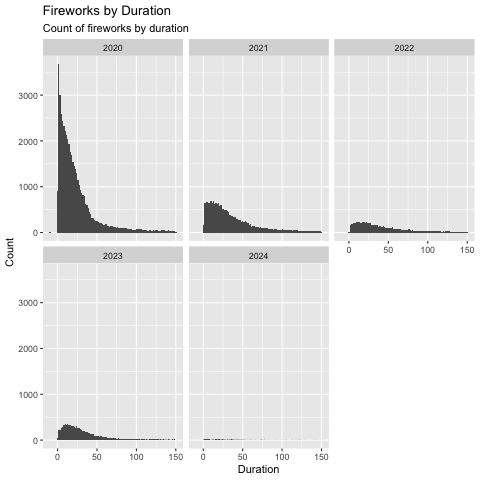

In [20]:
%%R
# code for plot 3
# make sure to make a meaningful title and subtitle
# filter Duration<150, year > 2019, draw a histogram by duration, facet by year
df %>%
    filter(Duration < 150) %>%
    filter(year > 2019) %>%
    ggplot(aes(x = Duration)) +
    geom_histogram(bins=100) +
    labs(title = 'Fireworks by Duration', subtitle = 'Count of fireworks by duration') +
    xlab('Duration') +
    ylab('Count') +
    facet_wrap(~year)

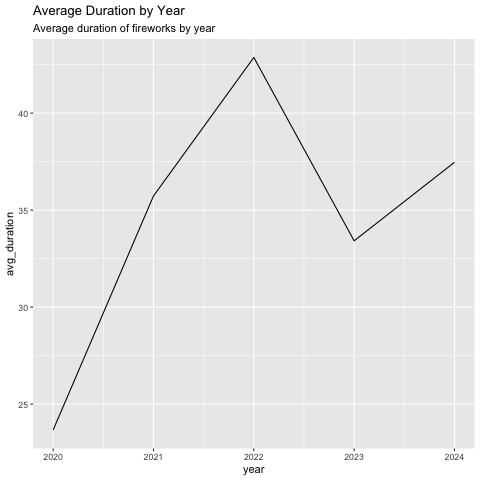

In [22]:
%%R
# average duration by year, draw a line plot
df %>%
    filter(Duration < 150) %>%
    filter(year > 2019) %>%
    group_by(year) %>%
    summarise(avg_duration = mean(Duration)) %>%
    ggplot(aes(x = year, y = avg_duration)) +
    geom_line() +
    labs(title = 'Average Duration by Year', subtitle = 'Average duration of fireworks by year') 


### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

In [ ]:
# code for plot 1
# make sure to make a meaningful title and subtitle

In [ ]:
# code for plot 2
# make sure to make a meaningful title and subtitle

In [ ]:
# code for plot 3
# make sure to make a meaningful title and subtitle